In [1]:
import pandas as pd

In [2]:
data1 = pd.read_csv('D:/Fourth Year (Second Term)/Graduation Project/Our Work/Current Work/new_data8.csv')

In [3]:
data1['EducationalLevel'] = data1['EducationalLevel'].fillna('None')

In [4]:
# List of columns to drop
columns_to_drop = ['MainActivityStatus']

# Drop the specified columns
data = data1.drop(columns=columns_to_drop, axis=1)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13472 entries, 0 to 13471
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   SocialSecurity            13472 non-null  object
 1   Age                       13472 non-null  int64 
 2   Sex                       13472 non-null  object
 3   DisabilityStatus          13472 non-null  object
 4   ChronicDisease            13472 non-null  object
 5   HealthInsurance           13472 non-null  object
 6   Area                      13472 non-null  object
 7   MaritalStatus             13472 non-null  object
 8   Father.s.Present.at.Home  13472 non-null  object
 9   EducationalLevel          13472 non-null  object
 10  EmploymentStatus          13472 non-null  object
 11  Sector.of.Employment      13472 non-null  object
 12  Occupation                13472 non-null  object
 13  Industry                  13472 non-null  object
dtypes: int64(1), object(13

In [6]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, MaxPooling1D, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [8]:
# Identify categorical and numerical columns
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
numerical_cols = data.select_dtypes(exclude=['object']).columns.tolist()
categorical_cols.remove('SocialSecurity')  # Remove the target variable from categorical columns

In [9]:
# Create a transformer for numerical data (scaling)
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

In [10]:
# Create a transformer for categorical data (one-hot encoding)
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


In [11]:
# Combine transformers into a preprocessor with ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [12]:
# Prepare target variable by mapping Yes/No to 1/0
target = data['SocialSecurity'].map({'Yes': 1, 'No': 0}).values

In [13]:
# Apply transformations to the features
X_preprocessed = preprocessor.fit_transform(data)

In [14]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, target, test_size=0.3, random_state=42)

X_train.shape, X_test.shape

((9430, 54), (4042, 54))

In [15]:
X_train_dense = X_train.toarray()
X_test_dense = X_test.toarray()

In [16]:
# Reshape the input data to add a channel dimension (required by Conv1D)
X_train_reshaped = X_train_dense.reshape(X_train_dense.shape[0], X_train.shape[1], 1)
X_test_reshaped = X_test_dense.reshape(X_test_dense.shape[0], X_test.shape[1], 1)

In [17]:
# Build a simple CNN model
model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Dropout(0.5),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

C:\Users\2023\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [19]:
# Output the model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 52, 64)         │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 26, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 26, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1664)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       106,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 106,881 (417.50 KB)

 Trainable params: 106,881 (417.50 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
history = model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, validation_split=0.3)

Epoch 1/10
207/207 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.7894 - loss: 0.4689 - val_accuracy: 0.8717 - val_loss: 0.3179
Epoch 2/10
207/207 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8691 - loss: 0.3369 - val_accuracy: 0.8763 - val_loss: 0.3120
Epoch 3/10
207/207 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8705 - loss: 0.3314 - val_accuracy: 0.8777 - val_loss: 0.3038
Epoch 4/10
207/207 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8726 - loss: 0.3333 - val_accuracy: 0.8795 - val_loss: 0.3016
Epoch 5/10
207/207 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8609 - loss: 0.3336 - val_accuracy: 0.8805 - val_loss: 0.3062
Epoch 6/10
207/207 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8691 - loss: 0.3419 - val_accuracy: 0.8809 - val_loss: 0.2983
Epoch 7/10
207/207 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8785 - loss: 0.3131 - val_accuracy: 0.8805 - val_loss: 0.2987
Epoch 8/10
207/207 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8700 - loss: 0.3254 - val_accuracy: 0

In [21]:
test_loss, test_acc = model.evaluate(X_test_reshaped, y_test)
print(f"Test Accuracy: {test_acc*100:.2f}%")

127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8843 - loss: 0.3094
Test Accuracy: 88.37%


In [22]:
# Assuming model and X_test_reshaped are already defined and available
# Predict probabilities for the test set
y_pred_probs = model.predict(X_test_reshaped)

# Convert probabilities to binary labels
y_pred = (y_pred_probs > 0.5).astype(int).flatten()

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Optionally, calculate additional metrics like accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")

127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Confusion Matrix:
[[2239  167]
 [ 303 1333]]
Accuracy: 88.37%


In [23]:
#Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Optionally, calculate additional metrics like accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")

Confusion Matrix:
[[2239  167]
 [ 303 1333]]
Accuracy: 88.37%


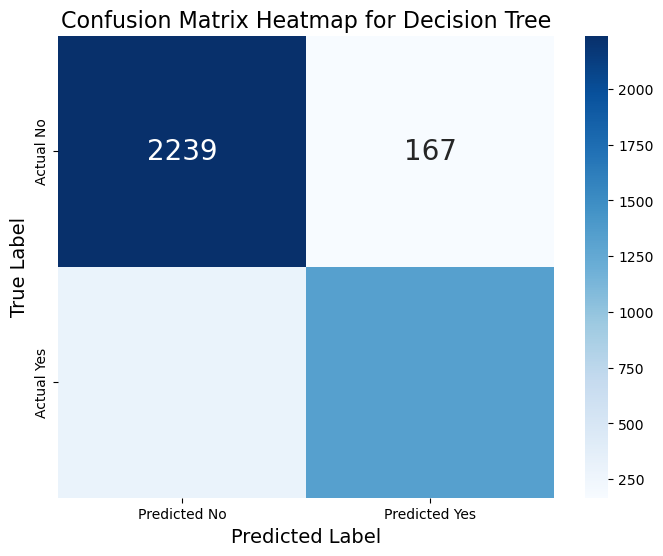

In [24]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="g", cmap="Blues", annot_kws={"size": 20},
            xticklabels=['Predicted No', 'Predicted Yes'],
            yticklabels=['Actual No', 'Actual Yes'])

plt.title('Confusion Matrix Heatmap for Decision Tree', fontsize=16)
plt.ylabel('True Label', fontsize=14)
plt.xlabel('Predicted Label', fontsize=14)
plt.show()

In [25]:
#### Evaluate the model performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))
print("ROC AUC score:", roc_auc_score(y_test, y_pred))
print("\nClassification report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8837209302325582
Precision: 0.8886666666666667
Recall: 0.8147921760391198
F1-score: 0.8501275510204083
ROC AUC score: 0.8726911836139074

Classification report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.91      2406
           1       0.89      0.81      0.85      1636

    accuracy                           0.88      4042
   macro avg       0.88      0.87      0.88      4042
weighted avg       0.88      0.88      0.88      4042



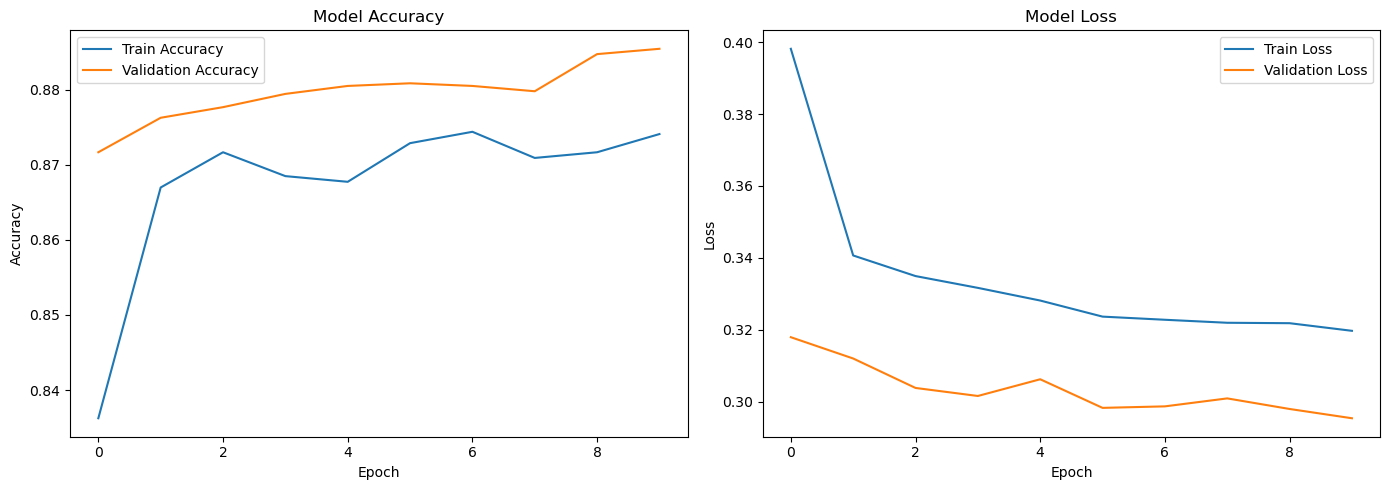

In [26]:
import matplotlib.pyplot as plt

# Assuming history is the variable that stores the training history
def plot_training_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(14, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')

    plt.tight_layout()
    plt.show()

# Call the function to plot the training history
plot_training_history(history)


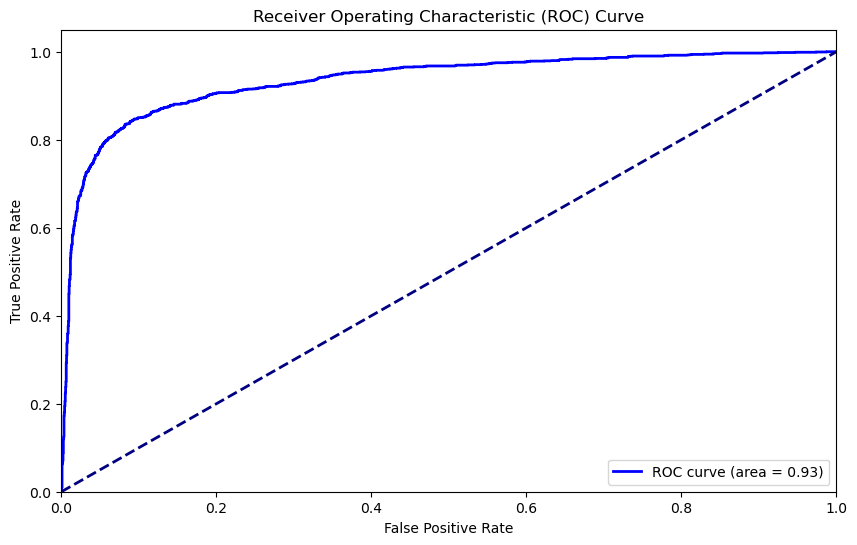

In [27]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming y_test and y_pred_probs are already defined
# y_pred_probs should be the predicted probabilities for the positive class

# Compute the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Accuracy values
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'CNN']
accuracy = [88.25, 87.09, 88.50, 88.52]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracy, color=['blue', 'lightgreen', 'red', 'orange'])
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy Comparison of Models')
plt.ylim(85, 90)
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'CNN']
accuracy = [88.25, 87.09, 88.50, 88.45]
specificity = [82.02, 78.46, 81.27, 80.07]
sensitivity = [92.33, 92.75, 93.24, 94.15]
roc_auc = [0.94, 0.86, 0.94, 0.93]

# Define the figure and axes
fig, ax = plt.subplots(3, 2, figsize=(14, 18))

# Plot accuracy
ax[0, 0].bar(models, accuracy, color=['blue', 'green', 'red', 'purple'])
ax[0, 0].set_title('Accuracy Comparison')
ax[0, 0].set_ylim(80, 100)
ax[0, 0].set_ylabel('Accuracy (%)')

# Plot specificity
ax[1, 0].bar(models, specificity, color=['blue', 'lightgreen', 'red', 'orange'])
ax[1, 0].set_title('Specificity Comparison')
ax[1, 0].set_ylim(70, 90)
ax[1, 0].set_ylabel('Specificity (%)')

# Plot F1-score
ax[1, 1].bar(models, sensitivity, color=['blue', 'lightgreen', 'red', 'orange'])
ax[1, 1].set_title('Sensitivity Comparison')
ax[1, 1].set_ylim(70, 90)
ax[1, 1].set_ylabel('Sensitivity (%)')

# Plot ROC AUC
ax[2, 0].bar(models, roc_auc, color=['blue', 'lightgreen', 'red', 'orange'])
ax[2, 0].set_title('ROC AUC Comparison')
ax[2, 0].set_ylim(0.5, 1)
ax[2, 0].set_ylabel('ROC AUC')

# Remove the empty subplot
fig.delaxes(ax[2, 1])

# Adjust layout
plt.tight_layout()
plt.show()


ValueError: cannot reshape array of size 509220 into shape (9430,28,28,1)